# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

In [ ]:
%%sh
pip install matplotlib

# Fundamentals of estimation

Two main concepts:

$$
\hat{\Theta}_{n}: \text{Point Estimator for a parameter} \\
\theta^{*}: \text{True parameter}
$$

The point estimator can be for different situations, such as predicting a parameter, a distribution (when the real distribution and nature is **not known**), or a regressor/classifer. 

> It approaches the true parameter $\theta^{*}$ if the bias of the estimator, and the standard error of the estimator $\rightarrow \infty$.

$$
    bias(\hat{\Theta}_{n}(X)) = E[\hat{\Theta}_{n}]-\theta^{*} \\ 
    ----- \\
    se(\hat{\Theta}_{n}(X)) = \sqrt{Var[\hat{\Theta}_{n}(X)]} \\
    ----- \\
$$

Assume that you have collected n observations, which are I.I.D. The sum of such observations (which are also essentially Random Variables) is given by T.

$$
    Var(T) = Var(X_1) + Var(X_2) + ... + Var(X_n) = n\sigma^2
$$

Empirical variance:

$$
    Var(T/n) = \frac{1}{n^2}V(T) \\
    ----- \\
    se(T/n) = \sqrt{\frac{n\sigma^2}{n^2}} = \frac{\sigma}{\sqrt{n}}
$$

Mean Squared Error of an estimator $\hat{\Theta}_{n}$:

$$ 
    mse(\hat{\Theta}_{n}(X)) = E[(\hat{\Theta}_{n}-\theta^{*})^2]
$$

If you expand the above equation, you should get that:

$$
    mse(\hat{\Theta}_{n}(X)) = bias(\hat{\Theta}_{n}(X))^2 + se(\hat{\Theta}_{n}(X))^2
$$

BIAS-VARIANCE Tradeoff.

## What are examples of estimators?

We have:
- a sample from a probability distribution (“the model”)
- We don’t know the parameters of that distribution

How do we find the parameters to best match our sample data?
- Method 1: Method of Moments
- Method 2: **Maximum Likelihood Estimation (MLE)**

## Example 1, the mean

In [2]:
import numpy as np
def mean_estimator(x): # x is our data
    return np.mean(x)

In [3]:
sample = np.random.normal(size=100)
mean_estimator(sample)

np.float64(0.33253425181392954)

## Example 2, linear regression

In [5]:
def linear_regression(x,y):
    # Here x,y is our data
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x,y)
    return lambda x1: lr.predict(x1)

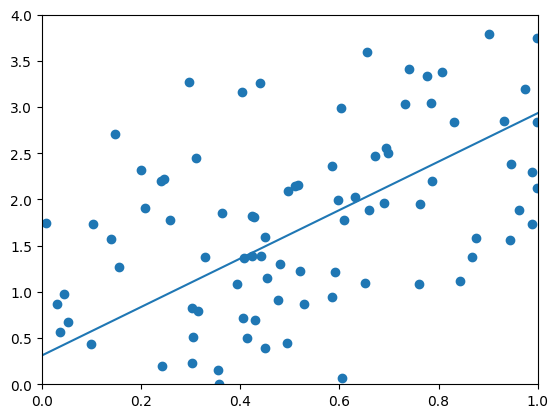

In [6]:
sample_x = np.random.uniform(0,1,size=100).reshape(-1,1)
sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
g_star = linear_regression(sample_x,sample_y)

# Lets plot out function
import matplotlib.pyplot as plt
x_plot = np.linspace(0,1,10)
plt.xlim(0,1)
plt.ylim(0,4)
plt.plot(x_plot,g_star(x_plot.reshape(-1,1)))
plt.scatter(sample_x,sample_y)

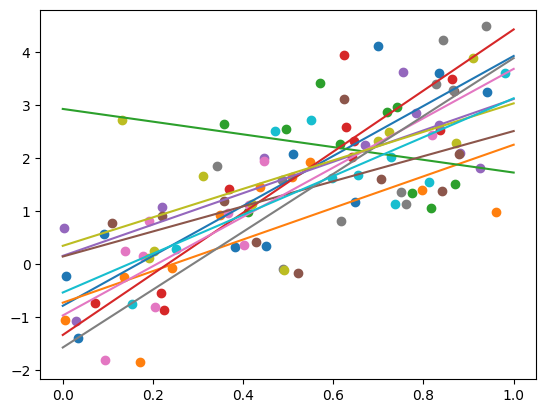

In [8]:
import matplotlib.pyplot as plt
from time import sleep

for i in range(10):
    sample_x = np.random.uniform(0,1,size=10).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    g_star = linear_regression(sample_x,sample_y)

    # Lets plot out function
    plt.scatter(sample_x,sample_y)
    x_plot = np.linspace(0,1,10)
    plt.plot(x_plot,g_star(x_plot.reshape(-1,1)))

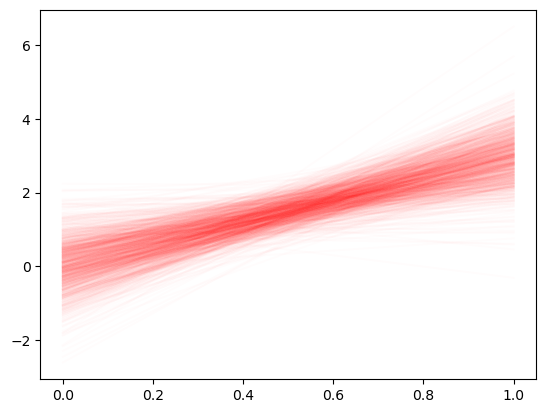

In [8]:
import matplotlib.pyplot as plt
for i in range(1000):
    sample_x = np.random.uniform(0,1,size=10).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    g_star = linear_regression(sample_x,sample_y)

    # Lets plot out function
    #plt.scatter(sample_x,sample_y,alpha=0.1,color='blue')
    x_plot = np.linspace(0,1,10)
    plt.plot(x_plot,g_star(x_plot.reshape(-1,1)),alpha=0.01,color='red')

## Example, testing error

In [ ]:
def gen_data(n_samples):
    sample_x = np.random.uniform(0,1,size=n_samples).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    return sample_x,sample_y

In [ ]:
xtrain,ytrain = gen_data(10)
g_star = linear_regression(xtrain,ytrain)

In [ ]:
def test_error():
    xtest,ytest = gen_data(100)
    predictions = g_star(xtest)
    residual = ytest-predictions
    return np.mean(residual**2)

In [ ]:
plt.hist([test_error() for i in range(100)])

## Strong law of large numbers
Taking a sample of 10,100,1000,10000 will lead us closer and closer to the actual mean. The np.cumsum() is different from sum(), as:

> at index i, the cumulative sum will represent the summation of all of the values at index 0 to i-1'st sample.

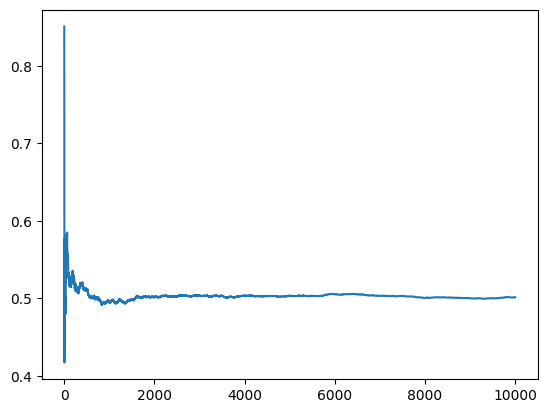

In [11]:
X = np.random.uniform(0,1,size=10000)
mean = np.cumsum(X)/np.arange(1,X.shape[0]+1)
plt.plot(mean)

In [ ]:
for i in range(100):
    X = np.random.exponential(size=1000)
    Y = np.sin(X)*np.exp(X)/X
    mean = np.cumsum(Y)/np.arange(1,Y.shape[0]+1)
    plt.plot(mean,color='blue',alpha=0.1)

## Convergence in distribution

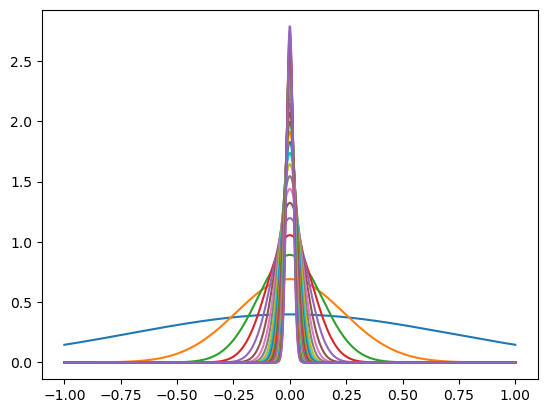

In [11]:
for  i in range(1,50,2):
    x = np.linspace(-1,1,1000)
    sigma = 1/i
    plt.plot(x,(1/np.sqrt(2*sigma*np.pi))*np.exp(-x**2/sigma**2))